In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("train.csv")
dftest=pd.read_csv("test.csv")

In [3]:
df.head(3)

,passenger_ID,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1214,3.0,"Smiljanic, Mr. Mile",male,NaN,0.0,0.0,315037,8.6625,NaN,S,0
1,677,3.0,"Bostandyeff, Mr. Guentcho",male,26.0,0.0,0.0,349224,7.8958,NaN,S,0
2,534,2.0,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0.0,0.0,250655,26.0000,NaN,S,1


In [4]:
dftest.head(3)

,passenger_ID,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1148,3.0,"Rintamaki, Mr. Matti",male,35.0,0.0,0.0,STON/O 2. 3101273,7.1250,NaN,S
1,1049,3.0,"Nakid, Mr. Sahid",male,20.0,1.0,1.0,2653,15.7417,NaN,C
2,982,3.0,"Lyntakoff, Mr. Stanko",male,NaN,0.0,0.0,349235,7.8958,NaN,S


In [5]:
from pandas import DataFrame
from pandas import Series

In [6]:
df.dtypes

passenger_ID      int64
pclass          float64
name             object
sex              object
age             float64
sibsp           float64
parch           float64
ticket           object
fare            float64
cabin            object
embarked         object
survived          int64
dtype: object

In [9]:
df['sex'].value_counts()

male      592
female    324
Name: sex, dtype: int64

In [10]:
df['survived'].value_counts() #331 people survived

0    585
1    331
Name: survived, dtype: int64

In [17]:
#Categorical Data: parch, sex, pclass, sisbsp, parch.
#Numerical Data: Age, Fare
df.isnull().sum() #187 missing data in age, one in fare. Age and Fare are numerical data

passenger_ID      0
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              0
cabin           712
embarked          1
survived          0
dtype: int64

In [41]:
df['fare'].fillna(df['fare'].mean(),inplace=True)
df['age'].fillna(df['age'].mean(),inplace=True)
dftest['age'].fillna(dftest['age'].mean(),inplace=True)

In [44]:
df.describe()

,passenger_ID,pclass,sex,age,sibsp,parch,fare,survived
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,656.248908,2.305677,0.646288,29.102309,0.539301,0.386463,33.709221,0.361354
std,381.176191,0.841811,0.478382,12.369046,1.082188,0.893933,52.811773,0.480655
min,0.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,328.250000,2.000000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000
50%,670.000000,3.000000,1.000000,29.102309,0.000000,0.000000,14.766650,0.000000
75%,974.250000,3.000000,1.000000,34.000000,1.000000,0.000000,31.275000,1.000000
max,1308.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [40]:
df['sex']=df['sex'].astype('category')
df['sex']=df['sex'].cat.codes
dftest['sex']=dftest['sex'].astype('category')
dftest['sex']=dftest['sex'].cat.codes

In [46]:
dftest.describe()

,passenger_ID,pclass,sex,age,sibsp,parch,fare
count,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000
mean,648.758270,2.269720,0.638677,31.672187,0.404580,0.381679,32.332188
std,370.986997,0.829017,0.480996,13.891867,0.934967,0.796594,49.199401
min,10.000000,1.000000,0.000000,0.416700,0.000000,0.000000,0.000000
25%,327.000000,2.000000,0.000000,24.000000,0.000000,0.000000,7.895800
50%,618.000000,3.000000,1.000000,31.672187,0.000000,0.000000,13.000000
75%,986.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.275000
max,1301.000000,3.000000,1.000000,74.000000,8.000000,6.000000,512.329200


In [47]:
dftest.isnull().sum()

passenger_ID      0
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              0
cabin           302
embarked          1
dtype: int64

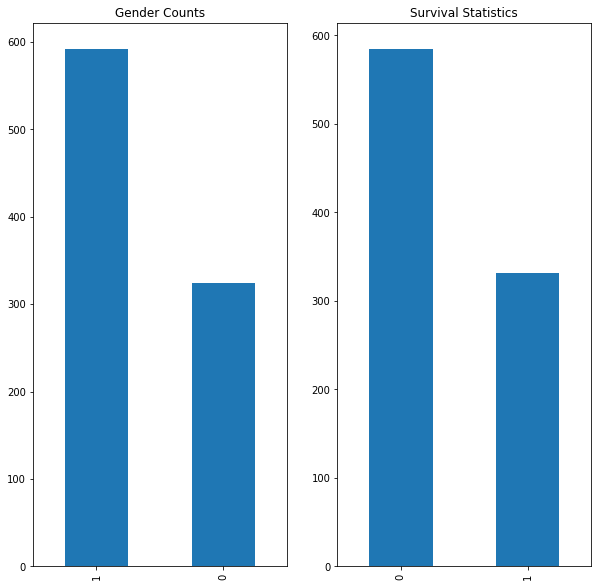

In [57]:
fig1=plt.figure(1, figsize=(10,10))
chart1=fig1.add_subplot(1,2,1)
df['sex'].value_counts().plot.bar(title='Gender Counts')
chart2=fig1.add_subplot(1,2,2)
df['survived'].value_counts().plot.bar(title='Survival Statistics')

In [69]:
X=df[['pclass','sex','sibsp','parch','age','fare']].values
Y=df['survived'].values
x=dftest[['pclass','sex','sibsp','parch','age','fare']].values

In [71]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression() 
model.fit(X, Y)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,penalty='l2', random_state=1, solver='liblinear', tol=0.0001,verbose=0, warm_start=False)
predict=model.predict(x)
predict

C:\Users\USER\Anaconda3new\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,

In [119]:
index=dftest[['passenger_ID']].values
solution=pd.DataFrame(index)
solution.columns=['passenger_ID']
predict=pd.DataFrame(predict)
solution['survived']=(predict)
solution

,passenger_ID,survived
0,1148,0
1,1049,0
2,982,0
3,808,0
4,1195,0
...,...,...
388,325,0
389,919,0
390,532,0
391,1159,1


In [126]:
solution.to_csv("MySubmission.csv")